# Project's Figures and Statistical Analyses

This notebook was used to generate a collection of figures and perform some statistical comparisons for the project.

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# MetaBAT2 Kalø Vig (Bacteria taxonomy)
metabat2_kaloevig = pd.read_table(
    "binning/results/2022-03-17/checkm/kaloevig/metabat/bacteria/results_bacteria_kaloevig_metabat.tsv",
    skiprows=[616],
)

# MetaBAT2 Kalø Vig (Bacteria taxonomy)
metabat2_loegten = pd.read_table(
    "binning/results/2022-03-17/checkm/loegten/metabat/bacteria/results_bacteria_loegten_metabat.tsv"
)

# DAS Tool (with MetaDecoder) Kalø Vig (Bacteria taxonomy)
dastool_kaloevig = pd.read_table(
    "binning/results/2022-03-22/checkm/kaloevig/dastool_metadecoder/bacteria/results_bacteria_kaloevig_dastool_metadecoder.tsv"
)

# DAS Tool (with MetaDecoder) Løgten (Bacteria taxonomy)
dastool_loegten = pd.read_table(
    "binning/results/2022-03-22/checkm/loegten/dastool_metadecoder/bacteria/results_bacteria_loegten_dastool_metadecoder.tsv"
)

# Exclude contamination above the minimum value of the DAS Tool dataset
# and completeness below the minimum value of the DAST Tool dataset to make it comparable with DAS Tool bins
metabat2_kaloevig = metabat2_kaloevig[
    (metabat2_kaloevig["Contamination"] < 70.45)
    & (metabat2_kaloevig["Completeness"] > 11.29)
]

metabat2_loegten = metabat2_loegten[
    (metabat2_loegten["Contamination"] < 50.69)
    & (metabat2_loegten["Completeness"] > 15.2)
]

In [2]:
## Style to use for plots

# Font for titles and subtitles
font_title = {"size": 22, "weight": "bold", "alpha": 0.75}
font_subtitle = {"size": 16, "alpha": 0.85}


def plot_style():
    """
    Improve plot style by increasing the label and tick font sizes.
    """

    # Remove ticks and set label size
    plt.tick_params(axis="both", labelsize=14, bottom=False, left=False)

    # Set x and y axes label size
    plt.xlabel(xlabel=plt.gca().get_xlabel(), size=18)
    plt.ylabel(ylabel=plt.gca().get_ylabel(), size=18)

In [3]:
def draw_kde(data_type, metabat_dataset, dastool_dataset, location):

    # Generate figure and axis
    fig, ax = plt.subplots(figsize=(15, 10))

    # Despine plots
    sns.despine()

    # Draw KDE plots
    sns.kdeplot(x=metabat_dataset[data_type], color="#005AB5", ax=ax)
    sns.kdeplot(x=dastool_dataset[data_type], color="#DC3220", ax=ax)

    # Title
    plt.title(
        f"KDE Plot of MetaBAT2 versus DAS Tool {data_type} in {location}",
        fontdict=font_title,
    )

    # Legend
    ax.legend(labels=["MetaBAT2", "DAS Tool"], fontsize=20, frameon=False)

    # Apply plot style
    plot_style()

## Contamination Plots and Statistics

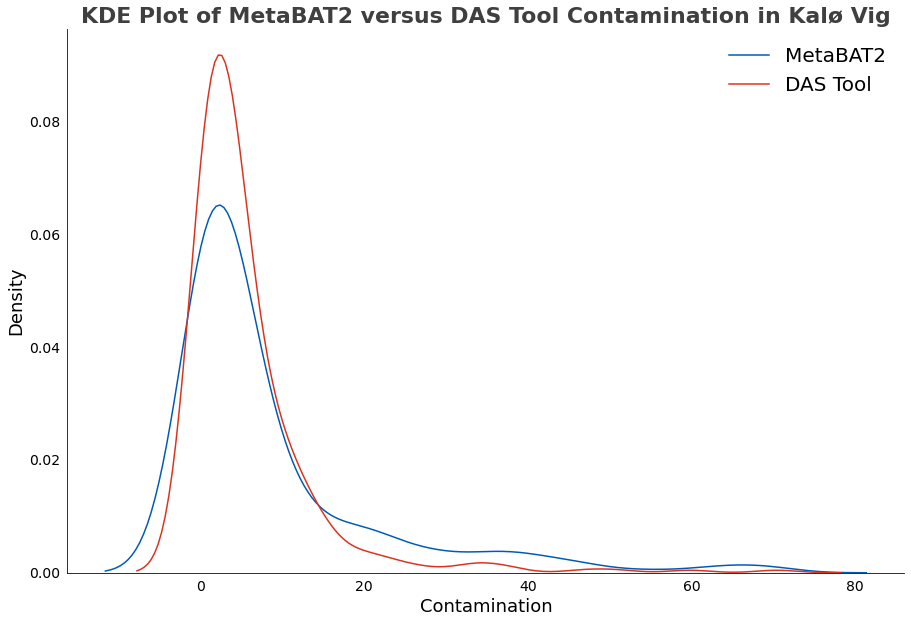

In [4]:
# Kalø Vig contamination
draw_kde(
    data_type="Contamination",
    metabat_dataset=metabat2_kaloevig,
    dastool_dataset=dastool_kaloevig,
    location="Kalø Vig",
)

plt.savefig("thesis_figures/kde_contamination_kaloevig.png")

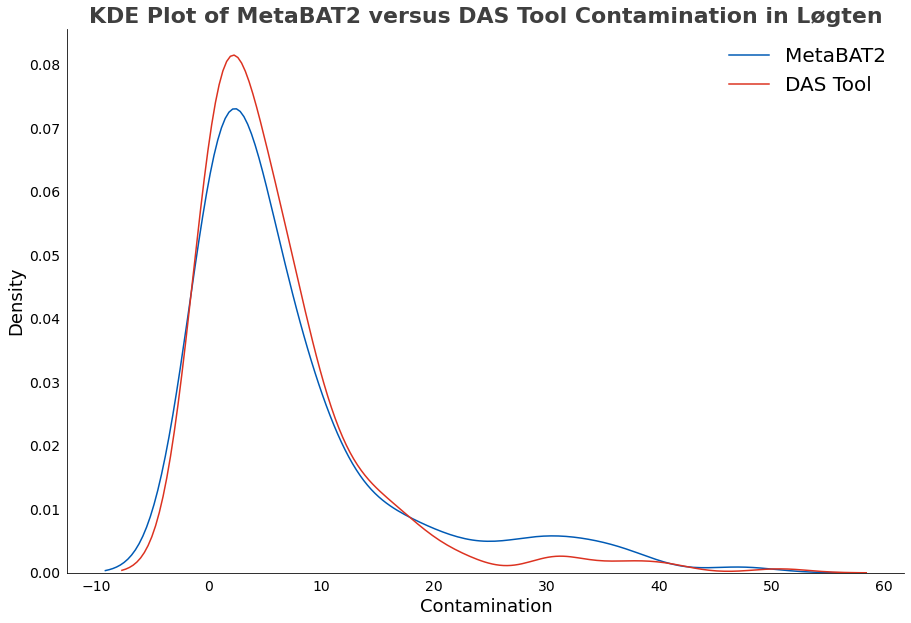

In [5]:
# Løgten contamination
draw_kde(
    data_type="Contamination",
    metabat_dataset=metabat2_loegten,
    dastool_dataset=dastool_loegten,
    location="Løgten",
)

plt.savefig("thesis_figures/kde_contamination_loegten.png")

In [6]:
# Shapiro-Wilk test of normality
from scipy.stats import shapiro

print(
    f"P-value of Shapiro-Wilk test for contamination of the Kalø Vig MetaBAT 2 sample is \
{shapiro(metabat2_kaloevig['Contamination']).pvalue}"
)
print(
    f"P-value of Shapiro-Wilk test for contamination of the Kalø Vig DAS Tool sample is \
{shapiro(dastool_kaloevig['Contamination']).pvalue}"
)

print()

print(
    f"P-value of Shapiro-Wilk test for contamination of the Løgten MetaBAT 2 sample is \
{shapiro(metabat2_loegten['Contamination']).pvalue}"
)
print(
    f"P-value of Shapiro-Wilk test for contamination of the Løgten DAS Tool sample is \
{shapiro(dastool_loegten['Contamination']).pvalue}"
)

P-value of Shapiro-Wilk test for contamination of the Kalø Vig MetaBAT 2 sample is 4.3003337411838063e-29
P-value of Shapiro-Wilk test for contamination of the Kalø Vig DAS Tool sample is 3.904463968903487e-27

P-value of Shapiro-Wilk test for contamination of the Løgten MetaBAT 2 sample is 7.92804230297417e-21
P-value of Shapiro-Wilk test for contamination of the Løgten DAS Tool sample is 3.8590957949447907e-20


None of these populations follows a normal distribution. Now, test for equality of variances. Use Levene's test because there distributions are not normal.

In [7]:
from scipy.stats import levene

kaloevig_contamination_levene = levene(
    metabat2_kaloevig["Contamination"], dastool_kaloevig["Contamination"]
).pvalue
loegten_contamination_levene = levene(
    metabat2_loegten["Contamination"], dastool_loegten["Contamination"]
).pvalue

print(
    f"P-value of the Levene's test for contamination in the Kalø Vig sample is {kaloevig_contamination_levene}"
)
print(
    f"P-value of the Levene's test for contamination in the Løgten sample is {loegten_contamination_levene}"
)

P-value of the Levene's test for contamination in the Kalø Vig sample is 2.821828836359736e-05
P-value of the Levene's test for contamination in the Løgten sample is 0.06465350698353328


It can be assumed that the variances in contamination betwteen the two setups are equal in the Løgten sample. However, Brunner-Munzel test will be used for both samples (does not require the equality of two variances). The null hypothesis of this test is that the probabilities of getting larger values from two samples are equal, which is a proxy for the equality of distributions.

In [8]:
from scipy.stats import brunnermunzel

kaloevig_contamination_bm = brunnermunzel(
    metabat2_kaloevig["Contamination"], dastool_kaloevig["Contamination"]
).pvalue
loegten_contamination_bm = brunnermunzel(
    metabat2_loegten["Contamination"], dastool_loegten["Contamination"]
).pvalue

print(
    f"P-value of the Brunner-Munzel test for contamination in the Kalø Vig sample is {kaloevig_contamination_bm}"
)
print(
    f"P-value of the Brunner-Munzel test for contamination in the Løgten sample is {loegten_contamination_bm}"
)

P-value of the Brunner-Munzel test for contamination in the Kalø Vig sample is 0.3955860450642138
P-value of the Brunner-Munzel test for contamination in the Løgten sample is 0.5396686458689355


Even though, the results of this statistical test are not significant, it is still visually observable that there was an improvement in the overall contamination.

## Completeness Plots and Statistics

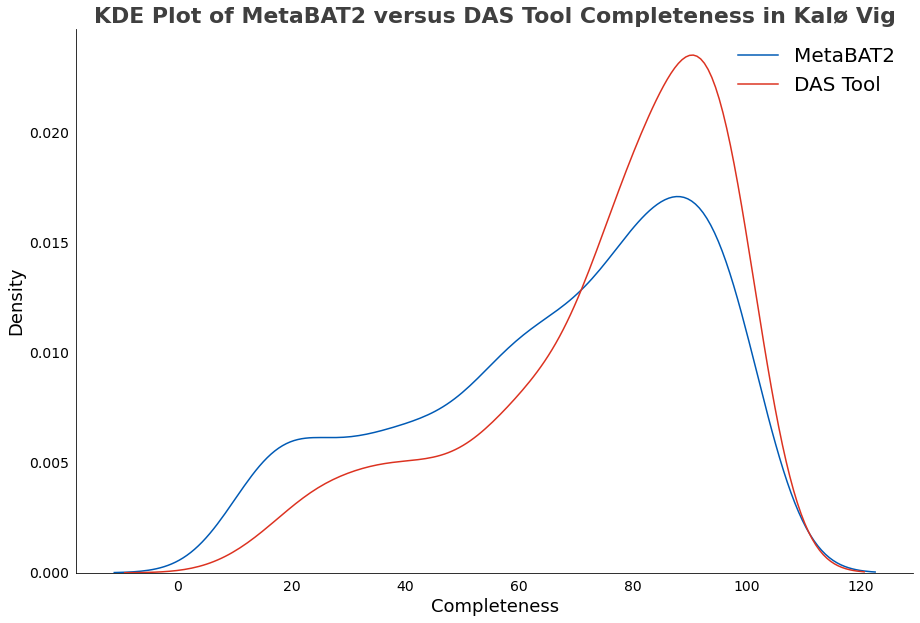

In [9]:
# Kalø Vig completeness
draw_kde(
    data_type="Completeness",
    metabat_dataset=metabat2_kaloevig,
    dastool_dataset=dastool_kaloevig,
    location="Kalø Vig",
)

plt.savefig("thesis_figures/kde_completeness_kaloevig.png")

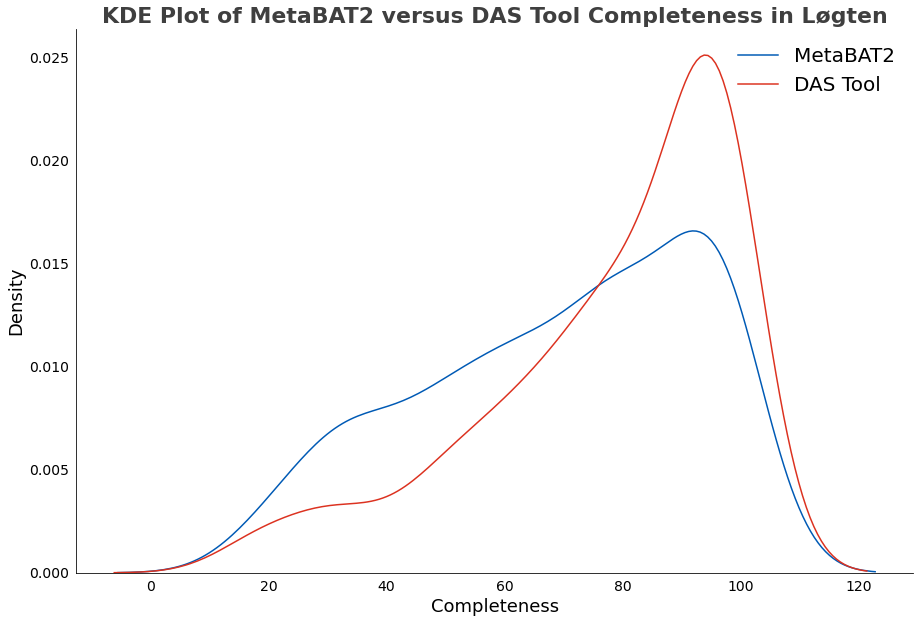

In [10]:
# Løgten completeness
draw_kde(
    data_type="Completeness",
    metabat_dataset=metabat2_loegten,
    dastool_dataset=dastool_loegten,
    location="Løgten",
)

plt.savefig("thesis_figures/kde_completeness_loegten.png")

In [11]:
print(
    f"P-value of Shapiro-Wilk test for completeness of the Kalø Vig MetaBAT 2 sample is \
{shapiro(metabat2_kaloevig['Completeness']).pvalue}"
)
print(
    f"P-value of Shapiro-Wilk test for completeness of the Kalø Vig DAS Tool sample is \
{shapiro(dastool_kaloevig['Completeness']).pvalue}"
)

print()

print(
    f"P-value of Shapiro-Wilk test for completeness of the Løgten MetaBAT 2 sample is \
{shapiro(metabat2_loegten['Completeness']).pvalue}"
)
print(
    f"P-value of Shapiro-Wilk test for completeness of the Løgten DAS Tool sample is \
{shapiro(dastool_loegten['Completeness']).pvalue}"
)

P-value of Shapiro-Wilk test for completeness of the Kalø Vig MetaBAT 2 sample is 1.3987989335351083e-14
P-value of Shapiro-Wilk test for completeness of the Kalø Vig DAS Tool sample is 1.482429312802075e-15

P-value of Shapiro-Wilk test for completeness of the Løgten MetaBAT 2 sample is 4.084310389895762e-10
P-value of Shapiro-Wilk test for completeness of the Løgten DAS Tool sample is 7.230881746232015e-14


In [12]:
kaloevig_completeness_levene = levene(
    metabat2_kaloevig["Completeness"], dastool_kaloevig["Completeness"]
).pvalue
loegten_completeness_levene = levene(
    metabat2_loegten["Completeness"], dastool_loegten["Completeness"]
).pvalue

print(
    f"P-value of Levene's test for completeness in the Kalø Vig sample is {kaloevig_completeness_levene}"
)
print(
    f"P-value of Levene's test for completeness in the Løgten sample is {loegten_completeness_levene}"
)

P-value of Levene's test for completeness in the Kalø Vig sample is 0.00011481841291349585
P-value of Levene's test for completeness in the Løgten sample is 0.010788134467360962


In [13]:
kaloevig_completeness_bm = brunnermunzel(
    metabat2_kaloevig["Completeness"], dastool_kaloevig["Completeness"]
).pvalue
loegten_completeness_bm = brunnermunzel(
    metabat2_loegten["Completeness"], dastool_loegten["Completeness"]
).pvalue

print(
    f"P-value of the Brunner-Munzel test for Completeness in the Kalø Vig sample is {kaloevig_completeness_bm}"
)
print(
    f"P-value of the Brunner-Munzel test for Completeness in the Løgten sample is {loegten_completeness_bm}"
)

P-value of the Brunner-Munzel test for Completeness in the Kalø Vig sample is 5.569077768941e-06
P-value of the Brunner-Munzel test for Completeness in the Løgten sample is 8.124201168913103e-06


In this case, the results are significant which confirms the visual observations of the improvements of completeness.

## Histogram of Completeness, # Contigs, N50, Contamination Differences


In [14]:
# Open FastANI datasets
fastani_path = "binning/results/2022-07-06/fastani"
kaloevig_fastani = pd.read_csv(
    f"{fastani_path}/kaloevig_fastani.csv",
    header=None,
)
loegten_fastani = pd.read_csv(f"{fastani_path}/loegten_fastani.csv", header=None)

# Drop irrelevant columns
kaloevig_fastani = kaloevig_fastani.iloc[:, 0:3]
loegten_fastani = loegten_fastani.iloc[:, 0:3]

# Leave only 100% matches
kaloevig_fastani = kaloevig_fastani[kaloevig_fastani.iloc[:, 2] == 100]
loegten_fastani = loegten_fastani[loegten_fastani.iloc[:, 2] == 100]

# Add column names
fastani_cols = ["metabat_bins", "final_bins", "match"]
kaloevig_fastani.columns = fastani_cols
loegten_fastani.columns = fastani_cols

# Remove pathnames
kaloevig_fastani["metabat_bins"] = kaloevig_fastani["metabat_bins"].str.replace(
    "data/kaloevig_metabat2/", ""
)
kaloevig_fastani["final_bins"] = kaloevig_fastani["final_bins"].str.replace(
    "data/kaloevig_final/", ""
)

loegten_fastani["metabat_bins"] = loegten_fastani["metabat_bins"].str.replace(
    "data/loegten_metabat2/", ""
)
loegten_fastani["final_bins"] = loegten_fastani["final_bins"].str.replace(
    "data/loegten_final/", ""
)

# Remove .fa extenson
kaloevig_fastani["metabat_bins"] = kaloevig_fastani["metabat_bins"].str.replace(
    ".fa", "", regex=False
)
kaloevig_fastani["final_bins"] = kaloevig_fastani["final_bins"].str.replace(
    ".fa", "", regex=False
)

loegten_fastani["metabat_bins"] = loegten_fastani["metabat_bins"].str.replace(
    ".fa", "", regex=False
)
loegten_fastani["final_bins"] = loegten_fastani["final_bins"].str.replace(
    ".fa", "", regex=False
)

# Open MetaBAT2 Quast tables
quast_cols = ["Assembly", "# contigs", "N50"]
kaloevig_metabat_quast = pd.read_table(
    "binning/results/2022-07-06/quast/kaloevig/transposed_report.tsv",
    usecols=quast_cols,
)
loegten_metabat_quast = pd.read_table(
    "binning/results/2022-07-06/quast/loegten/transposed_report.tsv", usecols=quast_cols
)

# Open MetaBAT2 CheckM tables
checkm_cols = ["Bin Id", "Completeness", "Contamination"]
kaloevig_metabat_checkm = pd.read_table(
    "binning/results/2022-03-17/checkm/kaloevig/metabat/bacteria/results_bacteria_kaloevig_metabat.tsv",
    usecols=checkm_cols,
)
loegten_metabat_checkm = pd.read_table(
    "binning/results/2022-03-17/checkm/loegten/metabat/bacteria/results_bacteria_loegten_metabat.tsv",
    usecols=checkm_cols,
)

# Open final quality tables
quality_cols = ["Bin Id", "Completeness", "Contamination", "# contigs", "N50"]
kaloevig_quality_table = pd.read_csv(
    "binning/results/2022-04-05/common_files/kaloevig_quality_table.csv",
    usecols=quality_cols,
)
loegten_quality_table = pd.read_csv(
    "binning/results/2022-04-05/common_files/loegten_quality_table.csv",
    usecols=quality_cols,
)

In [15]:
# Merge FastANI and quality tables
### Kalø Vig ###
kaloevig_merged = kaloevig_fastani.merge(
    kaloevig_metabat_checkm, how="left", left_on="metabat_bins", right_on="Bin Id"
)

kaloevig_merged = kaloevig_merged.merge(
    kaloevig_metabat_quast, how="left", left_on="metabat_bins", right_on="Assembly"
)
kaloevig_merged = kaloevig_merged.merge(
    kaloevig_quality_table,
    how="left",
    left_on="final_bins",
    right_on="Bin Id",
    suffixes=["_metabat2", "_final"],
)

### Løgten ###
loegten_merged = loegten_fastani.merge(
    loegten_metabat_checkm, how="left", left_on="metabat_bins", right_on="Bin Id"
)
loegten_merged = loegten_merged.merge(
    loegten_metabat_quast, how="left", left_on="metabat_bins", right_on="Assembly"
)
loegten_merged = loegten_merged.merge(
    loegten_quality_table,
    how="left",
    left_on="final_bins",
    right_on="Bin Id",
    suffixes=["_metabat2", "_final"],
)

In [16]:
# Compute difference in completeness and contamination between final and MetaBAT2 bins
def comp_diff(dataset):
    """
    Create new columns with differences between metrics of final and MetaBAT2 bins.
    """
    dataset["completeness_diff"] = (
        dataset["Completeness_final"] - dataset["Completeness_metabat2"]
    )
    dataset["contamination_diff"] = (
        dataset["Contamination_final"] - dataset["Contamination_metabat2"]
    )
    dataset["#_contigs_diff"] = (
        dataset["# contigs_final"] - dataset["# contigs_metabat2"]
    )
    dataset["N50_diff"] = dataset["N50_final"] - dataset["N50_metabat2"]


comp_diff(kaloevig_merged)
comp_diff(loegten_merged)

## Number of Genes - Heatmap

In [17]:
genes_path = "genes/results/2022-05-23"

# Open datasets
kaloevig_filter = pd.read_csv(f"{genes_path}/kaloevig_gene_interest.csv", header=None)
kaloevig_genes = pd.read_csv(f"{genes_path}/kaloevig_genes.csv")

loegten_filter = pd.read_csv(f"{genes_path}/loegten_gene_interest.csv", header=None)
loegten_genes = pd.read_csv(f"{genes_path}/loegten_genes.csv")

marine_gs_filter = pd.read_csv(f"{genes_path}/marine_gs_gene_interest.csv", header=None)
marine_gs_genes = pd.read_csv(f"{genes_path}/marine_gs_illumina_genes.csv")

# Filter to get only bins of intereston_oxidation
def filter_dataset(dataset, dataset_filter):
    """Filter dataset for genes of interest."""
    return dataset[dataset["Bin Id"].isin(dataset_filter[0])].reset_index(drop=True)


kaloevig_filtered = filter_dataset(kaloevig_genes, kaloevig_filter)
loegten_filtered = filter_dataset(loegten_genes, loegten_filter)
marine_gs_filtered = filter_dataset(marine_gs_genes, marine_gs_filter)


def extract_taxa(taxa):
    """Return a taxon from a list of taxa if any taxon name is present after the taxon category and double underscore."""
    return [taxon for taxon in taxa if len(taxon) > 3][-1]


def prepare_dataset(dataset):
    """Prepare dataset for heatmap drawing."""
    # Rename gene ids to readable names
    rename_genes = {
        "AAR35877.1": "OmcS",
        "AAN54831.1": "MtrC",
        "WP_010943369.1": "OmcB",
        "WP_010943365.1": "OmcC",
        "ABL63052.1": "PioA",
        "AAR35452.1": "OmcZ",
    }
    dataset = dataset.rename(rename_genes, axis="columns")

    dataset.loc[:, "Taxon"] = (
        dataset["classification"].str.split(";").apply(extract_taxa)
    )
    dataset = dataset.sort_values("Taxon", ascending=False)

    return dataset


# Filter datasets
kaloevig_filtered = prepare_dataset(kaloevig_filtered)
loegten_filtered = prepare_dataset(loegten_filtered)
marine_gs_filtered = prepare_dataset(marine_gs_filtered)

# Prepare datasets
kaloevig_final = prepare_dataset(kaloevig_filtered)
loegten_final = prepare_dataset(loegten_filtered)
marine_gs_final = prepare_dataset(marine_gs_filtered)

kaloevig_final.set_index("Taxon", inplace=True)
loegten_final.set_index("Taxon", inplace=True)
marine_gs_final.set_index("Taxon", inplace=True)

marine_gs_final = marine_gs_final.fillna(0)


def draw_heatmap(dataset, title):
    """Draws a heatmap out of input dataset, and sets a specified title."""
    genes = ["OmcS", "MtrC", "OmcB", "OmcC", "PioA", "OmcZ"]
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.heatmap(dataset[genes], cmap="Blues", ax=ax)
    plt.xlabel("Proteins")
    plt.title(title, fontdict=font_title)

    # Increase size of colorbar labels
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)

    plot_style()

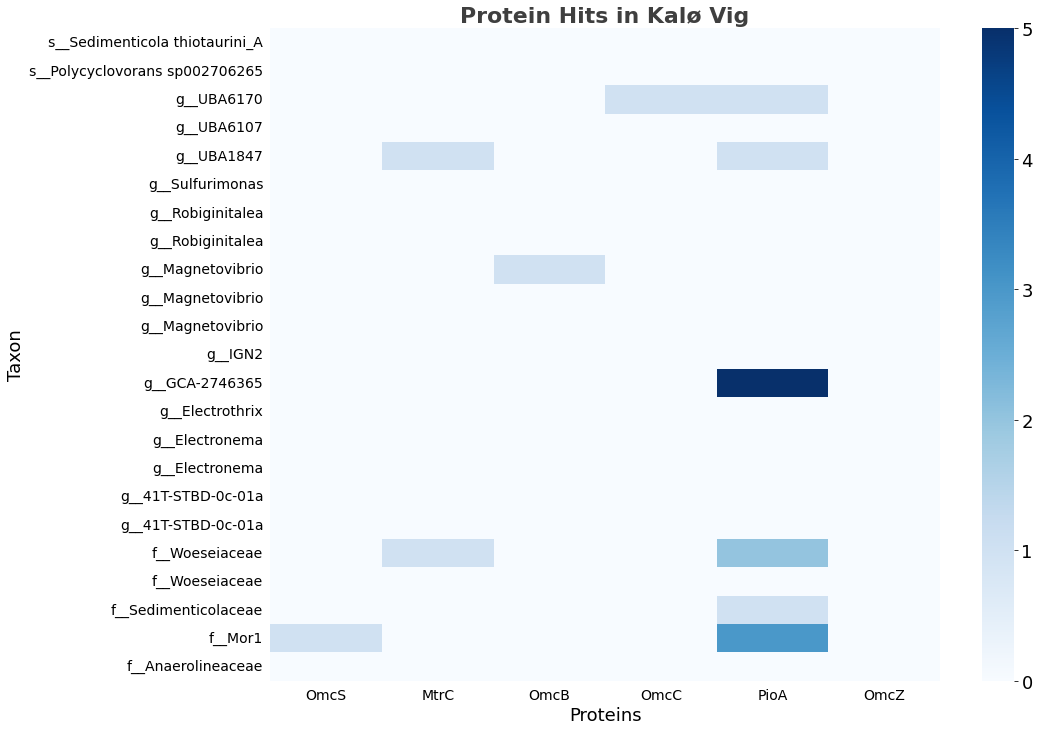

In [18]:
draw_heatmap(kaloevig_final, "Protein Hits in Kalø Vig")
plt.savefig("thesis_figures/gene_hits_in_kalo_vig.png")

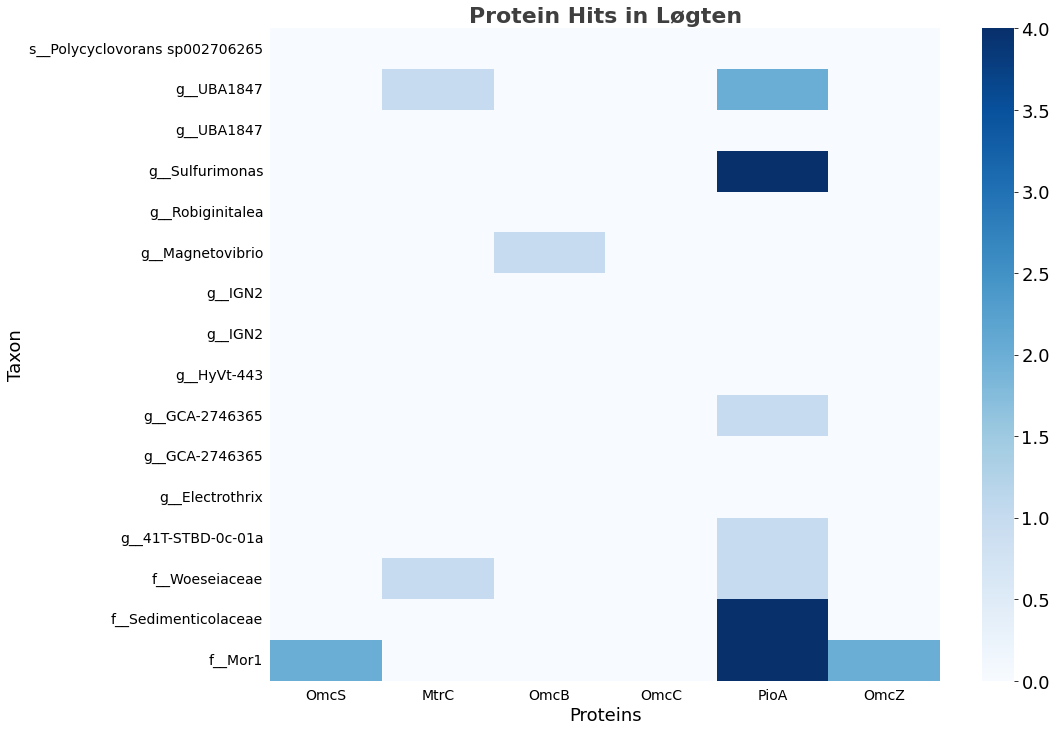

In [19]:
draw_heatmap(loegten_final, "Protein Hits in Løgten")
plt.savefig("thesis_figures/gene_hits_in_logten.jpg")

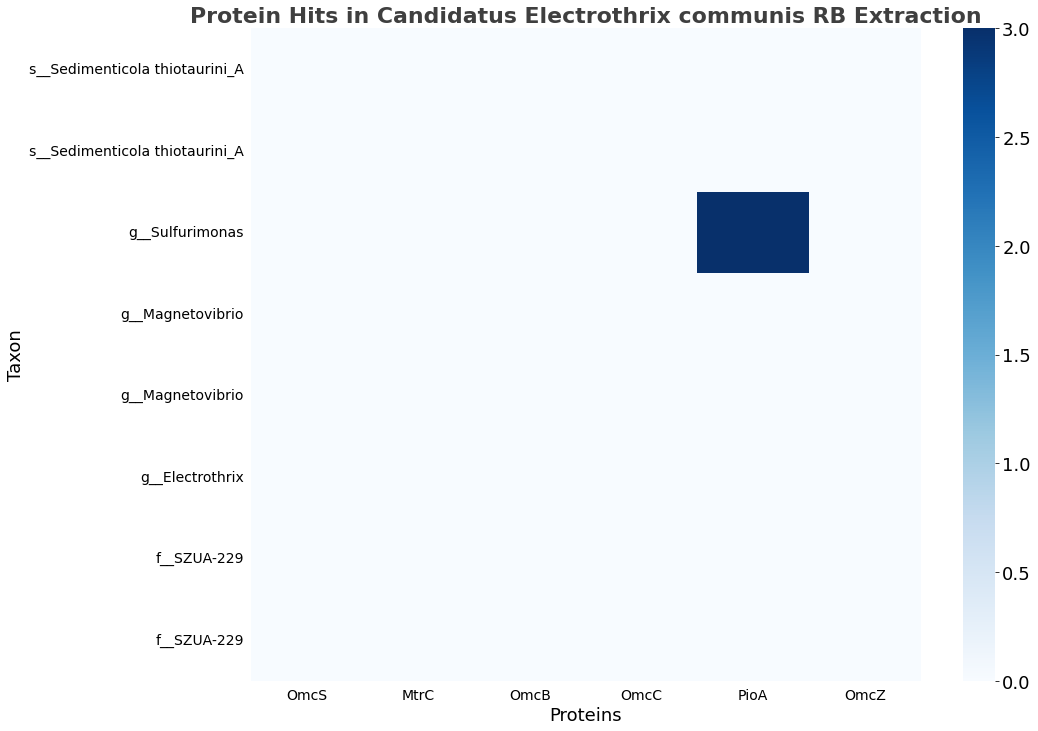

In [20]:
draw_heatmap(
    marine_gs_final, "Protein Hits in Candidatus Electrothrix communis RB Extraction"
)
plt.savefig("thesis_figures/gene_hits_marine_gs.png")

## Abundance Barplots of Taxa of Interest

In [21]:
def draw_barplot(dataset, title, bins=10):
    """Draw horizontal barplot of taxa abundance."""
    dataset = dataset.reset_index()

    # Sort taxa by abundance for bar ordering
    dataset = dataset.sort_values("AvgDepth", ascending=False).head(bins)

    fig, ax = plt.subplots(figsize=(15, 15))
    dataset.plot.barh(x="Taxon", y="AvgDepth", ax=ax)

    # Highlight five most abundant taxes
    for bar in plt.gca().patches:
        if bar.get_width() < 65:
            bar.set_color("lightgrey")
        else:
            bar.set_color("#39A8F0")

    # Remove legend
    ax.get_legend().remove()

    # Set x label
    plt.xlabel("Average Coverage (Abundance)")

    # Plot style
    ax.invert_yaxis()
    sns.despine()
    plot_style()

    # Title
    plt.title(title, fontdict=font_title)

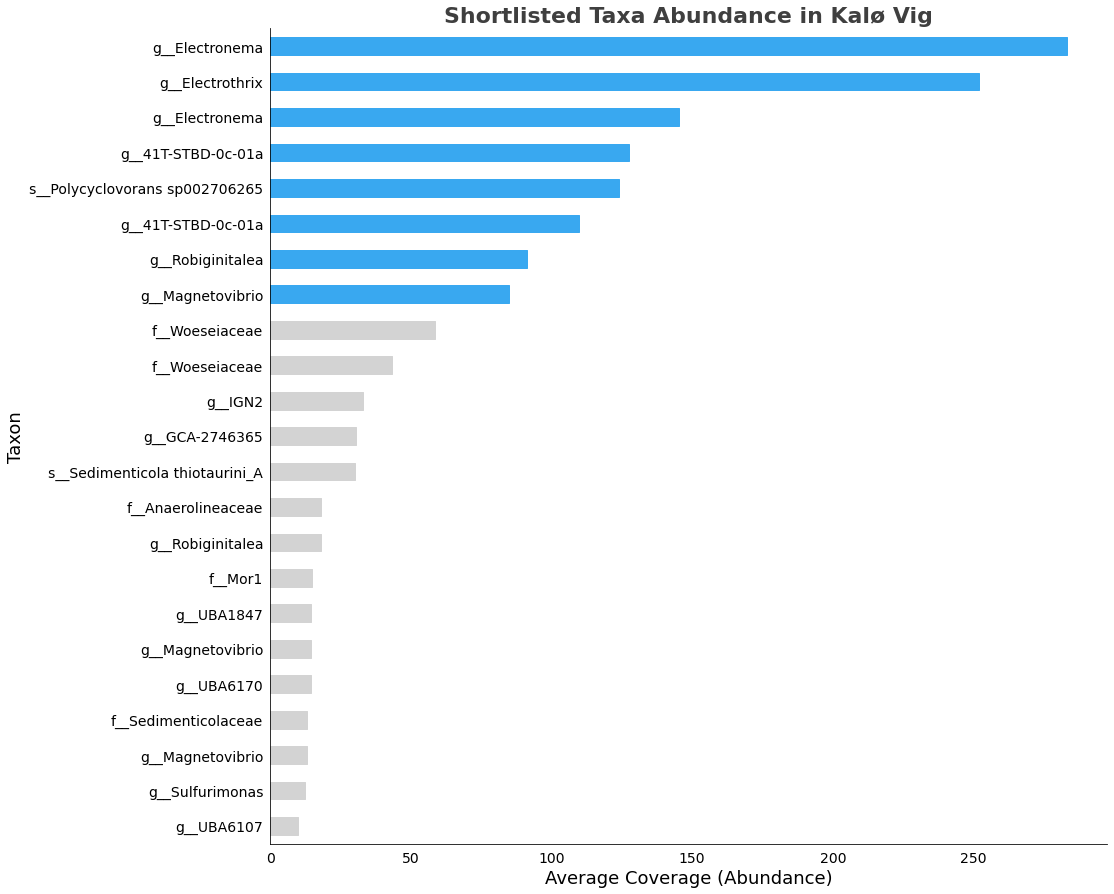

In [22]:
draw_barplot(kaloevig_final, "Shortlisted Taxa Abundance in Kalø Vig", bins=25)
plt.savefig("thesis_figures/shortlisted_taxa_abundance_in_kalo_vig.png")

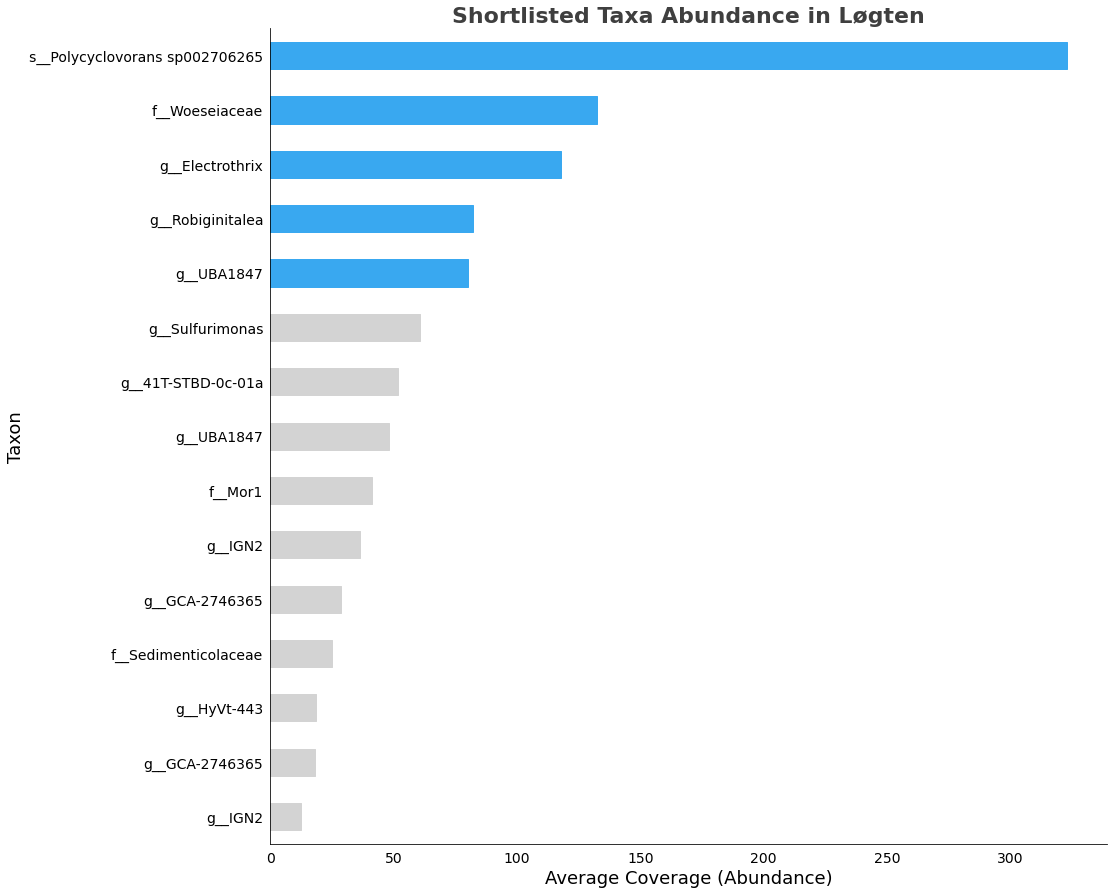

In [23]:
draw_barplot(loegten_final, "Shortlisted Taxa Abundance in Løgten", bins=15)
plt.savefig("thesis_figures/shortlisted_taxa_abundance_in_logten.png")

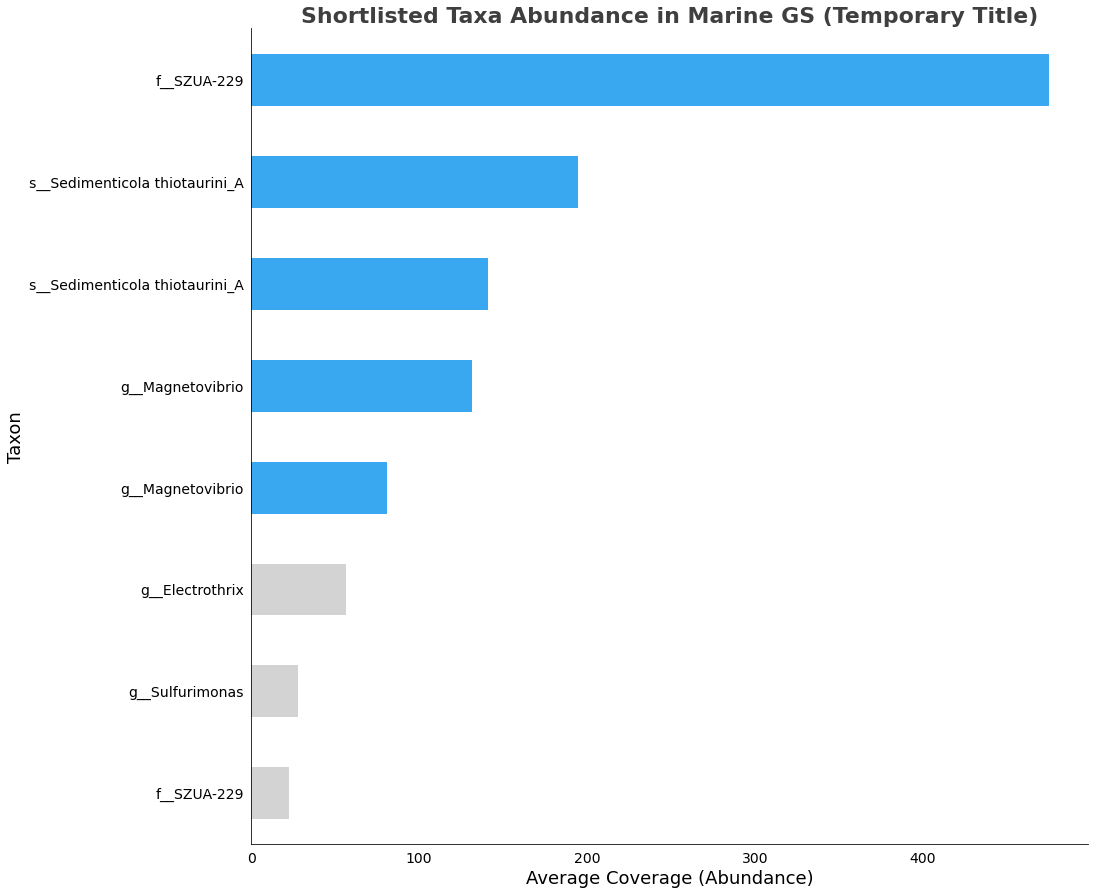

In [24]:
draw_barplot(
    marine_gs_final, "Shortlisted Taxa Abundance in Marine GS (Temporary Title)"
)
plt.savefig("thesis_figures/shortlisted_taxa_abundance_in_marine_gs.png")

In [25]:
# Prepare datasets for plot drawing
kaloevig_all_taxa = prepare_dataset(kaloevig_genes)
kaloevig_all_taxa = kaloevig_all_taxa.sort_values("AvgDepth", ascending=False)

loegten_all_taxa = prepare_dataset(loegten_genes)
loegten_all_taxa = loegten_all_taxa.sort_values("AvgDepth", ascending=False)

marine_gs_all_taxa = prepare_dataset(marine_gs_genes)
marine_gs_all_taxa = marine_gs_all_taxa.sort_values("AvgDepth", ascending=False)

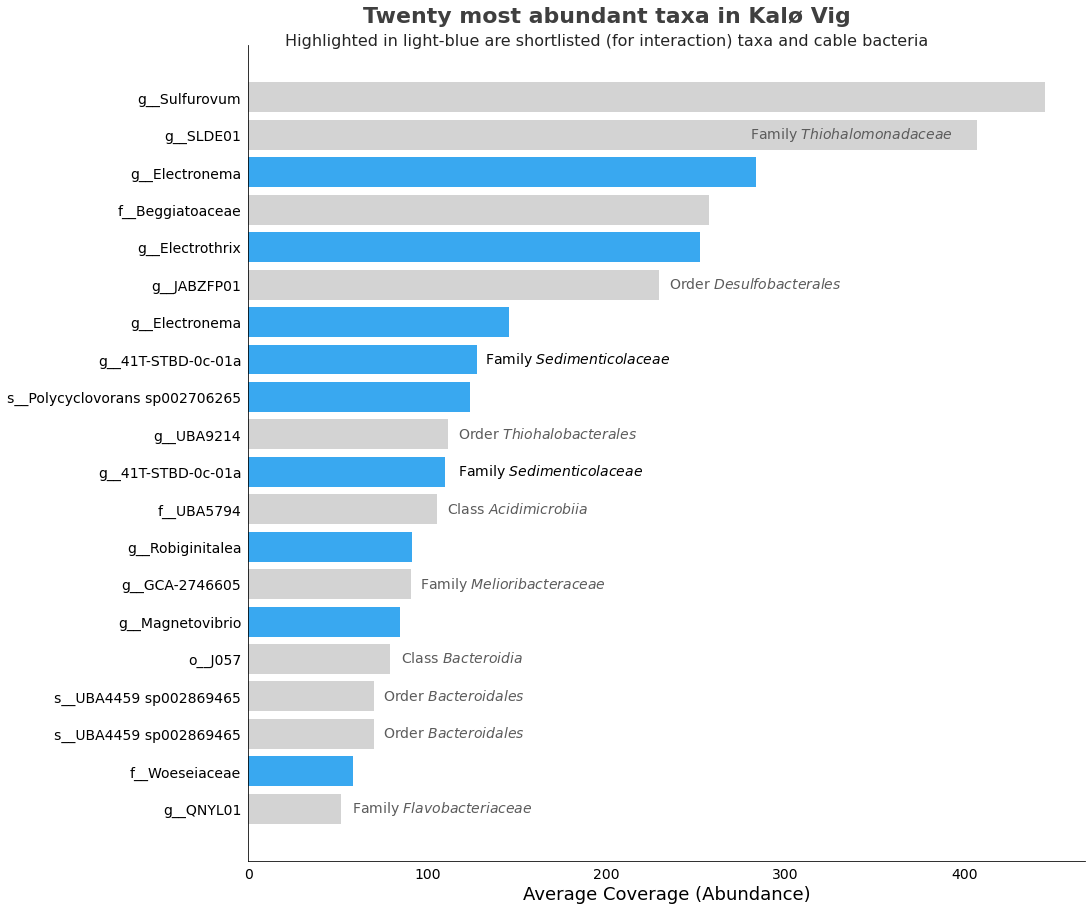

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))

# Labels and values
lab = list(kaloevig_all_taxa["Taxon"].head(20))
lab_y = [i for i in range(len(lab))]
val = kaloevig_all_taxa["AvgDepth"].head(20)

colors = [
    "#39A8F0" if taxa in kaloevig_final.index else "lightgrey"
    for taxa in kaloevig_all_taxa["Taxon"]
]

# Plot
plt.barh(lab_y, val, color=colors)

# Plot style
plt.yticks(lab_y, lab)
plot_style()
sns.despine()

plt.gca().invert_yaxis()
plt.xlabel("Average Coverage (Abundance)", fontsize=18)

# Title
plt.text(
    s="Twenty most abundant taxa in Kalø Vig",
    x=200,
    y=-2,
    ha="center",
    fontdict=font_title,
)

# Subtitle
plt.text(
    s="Highlighted in light-blue are shortlisted (for interaction) taxa and cable bacteria",
    x=200,
    y=-1.4,
    ha="center",
    fontdict=font_subtitle,
)

# Provide more background information on cryptically named taxa
black_style = dict(size=14, color="black")
grey_style = dict(size=14, color="#5C5C5C")

plt.text(s="Family $\itThiohalomonadaceae$", x=280, y=1.1, **grey_style)
plt.text(s="Order $\itDesulfobacterales$", x=235, y=5.1, **grey_style)
plt.text(s="Family $\itSedimenticolaceae$", x=132, y=7.1, **black_style)
plt.text(s="Order $\itThiohalobacterales$", x=117, y=9.1, **grey_style)
plt.text(s="Family $\itSedimenticolaceae$", x=117, y=10.1, **black_style)
plt.text(s="Class $\itAcidimicrobiia$", x=111, y=11.1, **grey_style)
plt.text(s="Family $\itMelioribacteraceae$", x=96, y=13.1, **grey_style)
plt.text(s="Class $\itBacteroidia$", x=85, y=15.1, **grey_style)
plt.text(s="Order $\itBacteroidales$", x=75, y=16.1, **grey_style)
plt.text(s="Order $\itBacteroidales$", x=75, y=17.1, **grey_style)
plt.text(s="Family $\itFlavobacteriaceae$", x=58, y=19.1, **grey_style)

plt.savefig("thesis_figures/twenty_most_abundant_taxa_in_kalovig.png")

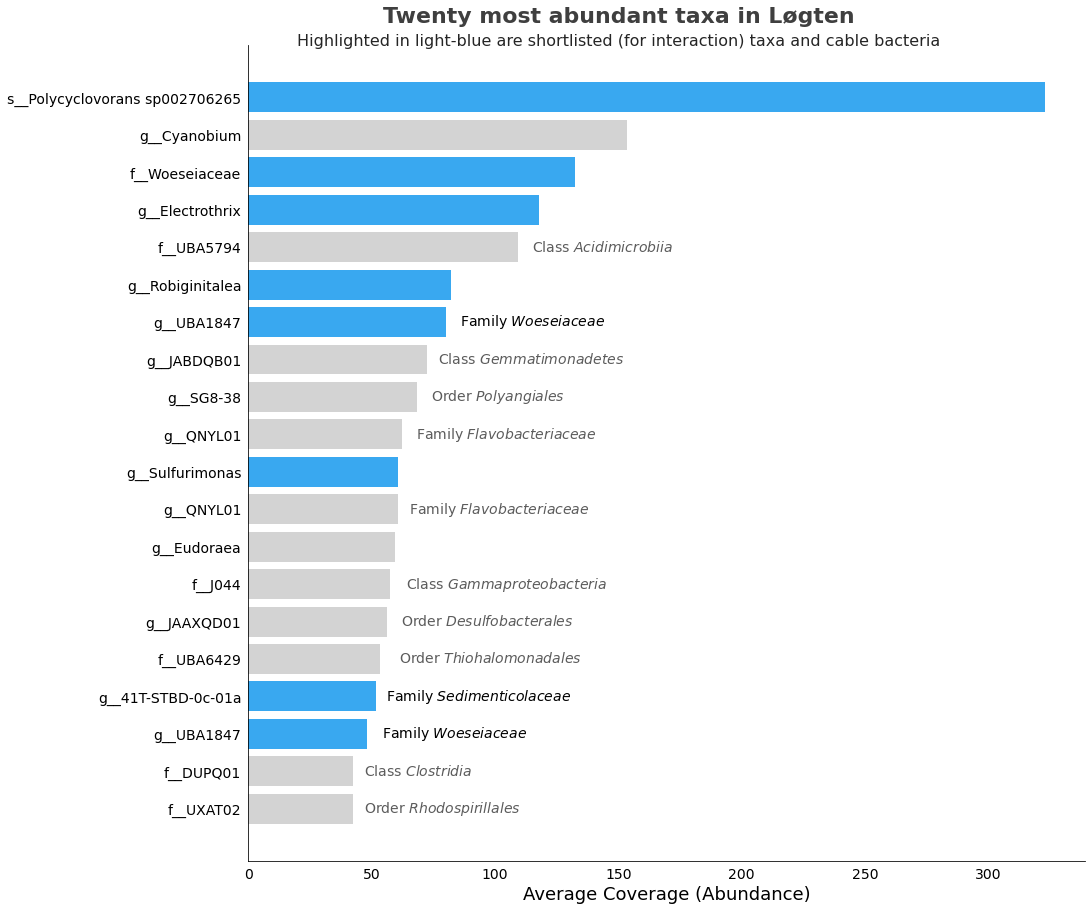

In [28]:
fig, ax = plt.subplots(figsize=(15, 15))

# Labels and values
lab = list(loegten_all_taxa["Taxon"].head(20))
lab_y = [i for i in range(len(lab))]
val = loegten_all_taxa["AvgDepth"].head(20)

colors = [
    "#39A8F0" if taxa in loegten_final.index else "lightgrey"
    for taxa in loegten_all_taxa["Taxon"]
]

# Plot
plt.barh(lab_y, val, color=colors)

# Plot style
plt.yticks(lab_y, lab)
plot_style()
sns.despine()

plt.gca().invert_yaxis()
plt.xlabel("Average Coverage (Abundance)", fontsize=18)

# Title
plt.text(
    s="Twenty most abundant taxa in Løgten",
    x=150,
    y=-2,
    ha="center",
    fontdict=font_title,
)

# Subtitle
plt.text(
    s="Highlighted in light-blue are shortlisted (for interaction) taxa and cable bacteria",
    x=150,
    y=-1.4,
    ha="center",
    fontdict=font_subtitle,
)

# Provide more background information on cryptically named taxa
plt.text(s="Class $\itAcidimicrobiia$", x=115, y=4.1, **grey_style)
plt.text(s="Family $\itWoeseiaceae$", x=86, y=6.1, **black_style)
plt.text(s="Class $\itGemmatimonadetes$", x=77, y=7.1, **grey_style)
plt.text(s="Order $\itPolyangiales$", x=74, y=8.1, **grey_style)
plt.text(s="Family $\itFlavobacteriaceae$", x=68, y=9.1, **grey_style)
plt.text(s="Family $\itFlavobacteriaceae$", x=65, y=11.1, **grey_style)
plt.text(s="Class $\itGammaproteobacteria$", x=64, y=13.1, **grey_style)
plt.text(s="Order $\itDesulfobacterales$", x=62, y=14.1, **grey_style)
plt.text(s="Order $\itThiohalomonadales$", x=61, y=15.1, **grey_style)
plt.text(s="Family $\itSedimenticolaceae$", x=56, y=16.1, **black_style)
plt.text(s="Family $\itWoeseiaceae$", x=54, y=17.1, **black_style)
plt.text(s="Class $\itClostridia$", x=47, y=18.1, **grey_style)
plt.text(s="Order $\itRhodospirillales$", x=47, y=19.1, **grey_style)

plt.savefig("thesis_figures/twenty_most_abundant_taxa_in_logten.png")

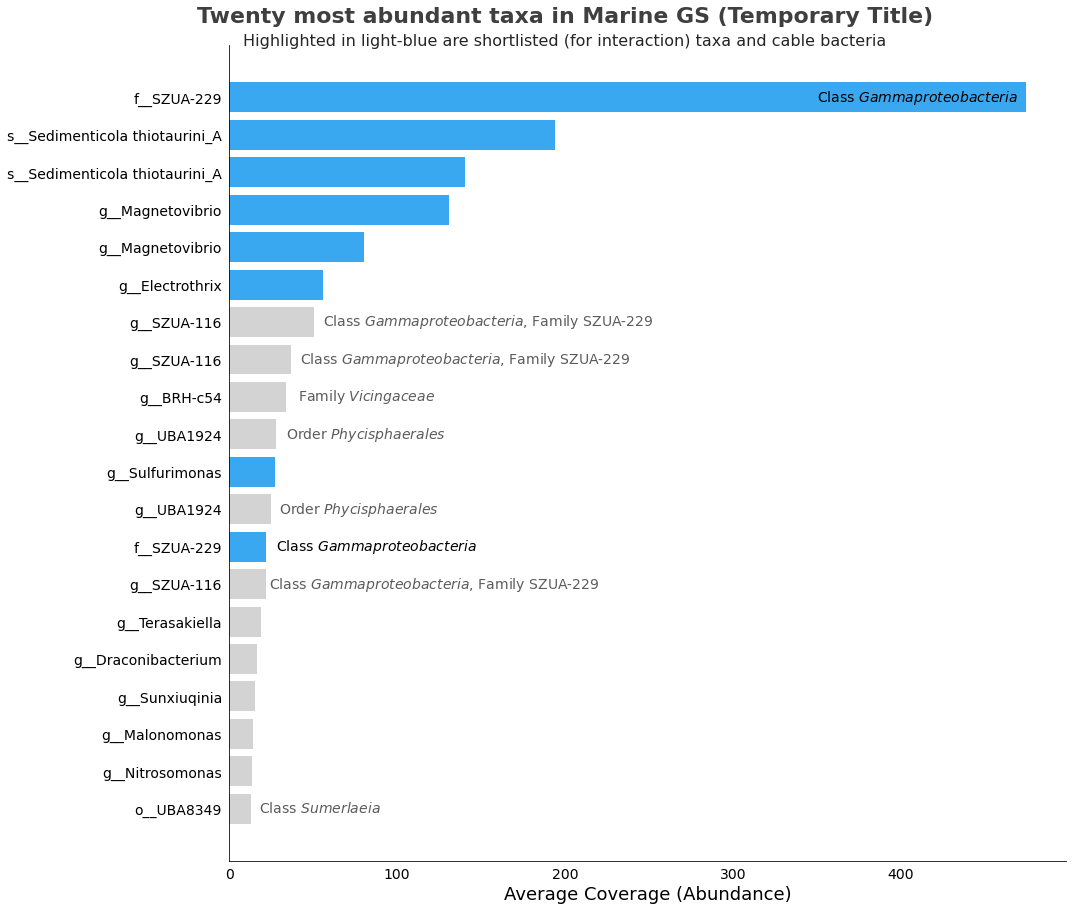

In [29]:
fig, ax = plt.subplots(figsize=(15, 15))

# Labels and values
lab = list(marine_gs_all_taxa["Taxon"].head(20))
lab_y = [i for i in range(len(lab))]
val = marine_gs_all_taxa["AvgDepth"].head(20)

colors = [
    "#39A8F0" if taxa in marine_gs_final.index else "lightgrey"
    for taxa in marine_gs_all_taxa["Taxon"]
]

# Plot
plt.barh(lab_y, val, color=colors)

# Plot style
plt.yticks(lab_y, lab)
plot_style()
sns.despine()

plt.gca().invert_yaxis()
plt.xlabel("Average Coverage (Abundance)", fontsize=18)

# Title
plt.text(
    s="Twenty most abundant taxa in Marine GS (Temporary Title)",
    x=200,
    y=-2,
    ha="center",
    fontdict=font_title,
)

# Subtitle
plt.text(
    s="Highlighted in light-blue are shortlisted (for interaction) taxa and cable bacteria",
    x=200,
    y=-1.4,
    ha="center",
    fontdict=font_subtitle,
)

# Provide more background information on cryptically named taxa
plt.text(s="Class $\itGammaproteobacteria$", x=350, y=0.1, **black_style)
plt.text(s="Class $\itGammaproteobacteria$, Family SZUA-229", x=56, y=6.1, **grey_style)
plt.text(s="Class $\itGammaproteobacteria$, Family SZUA-229", x=42, y=7.1, **grey_style)
plt.text(s="Family $\itVicingaceae$", x=41, y=8.1, **grey_style)
plt.text(s="Order $\itPhycisphaerales$", x=34, y=9.1, **grey_style)
plt.text(s="Order $\itPhycisphaerales$", x=30, y=11.1, **grey_style)
plt.text(s="Class $\itGammaproteobacteria$", x=28, y=12.1, **black_style)
plt.text(
    s="Class $\itGammaproteobacteria$, Family SZUA-229", x=24, y=13.1, **grey_style
)
plt.text(s="Class $\itSumerlaeia$", x=18, y=19.1, **grey_style)

plt.savefig("thesis_figures/twenty_most_abundant_taxa_in_marine_gs.png")